첨부자료는 서울 열린 데이터광장에서 제공하는 2021년 서울 자치구별 5대 범죄발생 현황 자료로써 교과목 진도에 맞게 재구성한 화일입니다.

*공공데이터 URL: https://data.seoul.go.kr/dataList/316/S/2/datasetView.do

#2021년 서울시 자치구별 5대 범죄 발생 현황 자료를 활용하여 다음 질문에 답하기 위한 데이터 분석 과정을 기술하세요.

#####1) 폭력 발생건수 많은 상위 10개 자치구의 강간, 절도, 폭력 발생건수를 **선차트**로 나타내시오.
#####2) 살인이 가장 많이 발생한 상위 5개 지자체의 살인 발생 건수와 살인 검거 건수를 **막대차트**로 나타내시오.
#####3) 범죄 발생 건수의 전체 합이 가장 적은 5개 지자체의 발생 비율을 **파이차트**로 나타내시오.


In [1]:
#matplotlib 에 한글 폰트를 지원하기 위한 설치 코드

!pip install koreanize-matplotlib
import koreanize_matplotlib

#1.데이터 수집(읽어오기) 및 정보 확인하기

In [2]:
# 데이터를 관리 및 정제하고 차트를 생성하기 위한 라이브러리 선언하기

import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# 2021년 서울시 5대 범죄발생현황.csv 화일 읽어오기


범죄발생현황 = pd.read_csv('2021년 서울시 5대 범죄발생현황.csv', encoding='EUC-KR',header=[3], skiprows=[4])
범죄발생현황


,자치구별,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,종로구,6,3,4,4,156,757,1079,743,1467,1248
1,중구,6,6,6,6,161,97,1279,739,1409,1224
2,용산구,3,2,1,1,141,103,945,484,1291,1069
3,성동구,3,4,4,1,110,82,905,497,1090,926
4,광진구,5,3,4,4,208,161,1414,754,1456,1280
5,동대문구,3,4,7,8,169,147,1240,659,1540,1295
6,중랑구,4,4,6,7,141,117,1399,835,1660,1442
7,성북구,4,3,2,2,118,88,895,474,1392,1220
8,강북구,4,4,1,1,136,115,777,537,1383,1255
9,도봉구,2,2,2,1,72,64,772,376,1012,851


In [4]:
#상위 5개 데이터 확인하기

범죄발생현황.head()

,자치구별,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,종로구,6,3,4,4,156,757,1079,743,1467,1248
1,중구,6,6,6,6,161,97,1279,739,1409,1224
2,용산구,3,2,1,1,141,103,945,484,1291,1069
3,성동구,3,4,4,1,110,82,905,497,1090,926
4,광진구,5,3,4,4,208,161,1414,754,1456,1280


In [5]:
#전반적인 행열 정보 확인하기

범죄발생현황.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구별    25 non-null     object
 1   살인_발생   25 non-null     int64 
 2   살인_검거   25 non-null     int64 
 3   강도_발생   25 non-null     int64 
 4   강도_검거   25 non-null     int64 
 5   강간_발생   25 non-null     int64 
 6   강간_검거   25 non-null     int64 
 7   절도_발생   25 non-null     int64 
 8   절도_검거   25 non-null     int64 
 9   폭력_발생   25 non-null     int64 
 10  폭력_검거   25 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.3+ KB


In [6]:
#수치적 통계분포 확인하기

범죄발생현황.describe()

,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
count,25.0000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4.9600,4.480000,4.88000,4.640000,196.440000,177.840000,1341.240000,718.000000,1670.280000,1415.520000
std,2.6533,2.347339,4.82459,4.599638,105.411922,147.522224,389.670938,184.510388,480.918437,416.987822
min,1.0000,1.000000,1.00000,1.000000,72.000000,64.000000,772.000000,376.000000,1012.000000,851.000000
25%,3.0000,3.000000,2.00000,2.000000,136.000000,103.000000,1027.000000,562.000000,1383.000000,1220.000000
50%,4.0000,4.000000,4.00000,4.000000,161.000000,120.000000,1361.000000,730.000000,1546.000000,1295.000000
75%,6.0000,6.000000,6.00000,6.000000,246.000000,196.000000,1510.000000,831.000000,1899.000000,1513.000000
max,12.0000,11.000000,25.00000,23.000000,578.000000,757.000000,2372.000000,1160.000000,3159.000000,2749.000000


#2.각 지문에 대하여 시각적으로 데이터 분석하기

###1)폭력 발생건수 많은 상위 10개 자치구의 강간, 절도, 폭력 발생건수를 **선 차트**로 나타내시오.

In [7]:
#데이터 시각화를 위해 데이터 재설정하기

폭력발생순 = 범죄발생현황.sort_values('폭력_발생', ascending=False).head()
폭력발생순



,자치구별,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
22,강남구,12,11,25,23,578,454,2372,1160,3159,2749
23,송파구,3,3,7,6,247,216,2024,995,2433,2046
20,관악구,8,4,7,6,321,269,1860,929,2248,1926
18,영등포구,8,8,11,11,279,196,1712,831,2169,1731
15,강서구,9,7,3,3,246,188,1540,921,2098,1925


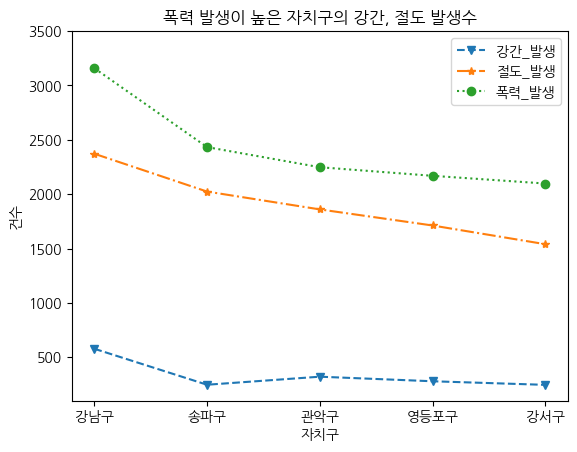

In [8]:
#선 차트 생성하고 꾸미기
plt.plot(폭력발생순['자치구별'], 폭력발생순['강간_발생'], label='강간_발생', linestyle='--', marker='v')
plt.plot(폭력발생순['자치구별'], 폭력발생순['절도_발생'], label='절도_발생', linestyle='-.', marker='*')
plt.plot(폭력발생순['자치구별'], 폭력발생순['폭력_발생'], label='폭력_발생', linestyle=':', marker='o')
plt.legend()

plt.rc('font', family='Malgun Gothic')
plt.ylim(100, 3500)
plt.title('폭력 발생이 높은 자치구의 강간, 절도 발생수')
plt.xlabel('자치구')
plt.ylabel('건수')

plt.show()


###2)살인이 가장 많이 발생한 상위 5개 지자체의 살인 발생 건수와 살인 검거 건수를 **막대차트**로 나타내시오.

In [9]:
#데이터 시각화를 위해 데이터 재설정하기

살인발생순 = 범죄발생현황.sort_values('살인_발생', ascending=False).head()
살인발생순


,자치구별,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
22,강남구,12,11,25,23,578,454,2372,1160,3159,2749
15,강서구,9,7,3,3,246,188,1540,921,2098,1925
21,서초구,9,9,5,5,312,228,1503,691,1827,1506
20,관악구,8,4,7,6,321,269,1860,929,2248,1926
18,영등포구,8,8,11,11,279,196,1712,831,2169,1731


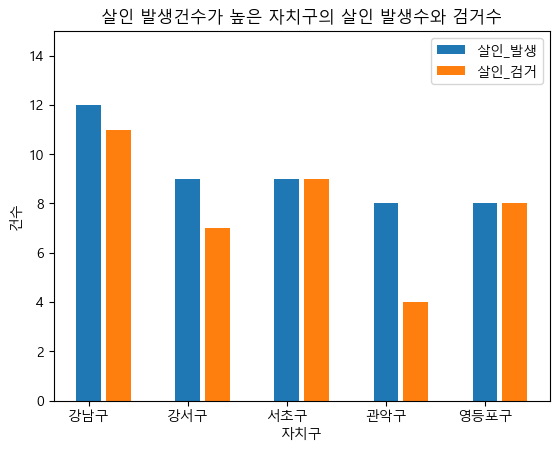

In [10]:
#막대 차트 생성하고 꾸미기

import numpy as np

pos = np.arange(len(살인발생순))
plt.xticks(pos, 살인발생순['자치구별'])

plt.bar(pos, 살인발생순['살인_발생'], label='살인_발생', width=0.25)
plt.bar(pos+0.3, 살인발생순['살인_검거'], label='살인_검거', width=0.25)
plt.legend()

plt.ylim(0, 15)
plt.title('살인 발생건수가 높은 자치구의 살인 발생수와 검거수')
plt.xlabel('자치구')
plt.ylabel('건수')

plt.show()


###3)범죄 발생 건수의 전체 합이 가장 적은 5개 지자체의 발생 비율을 **파이차트**로 나타내시오.

In [18]:
#데이터 시각화를 위해 데이터 재설정하기


범죄발생현황['범죄발생합계'] = 범죄발생현황['살인_발생'] + 범죄발생현황['강도_발생'] + 범죄발생현황['강간_발생'] + 범죄발생현황['절도_발생'] + 범죄발생현황['폭력_발생']
하위5개 = 범죄발생현황.sort_values('범죄발생합계', ascending=True).head()
하위5개

,자치구별,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거,범죄발생합계
9,도봉구,2,2,2,1,72,64,772,376,1012,851,1860
3,성동구,3,4,4,1,110,82,905,497,1090,926,2112
12,서대문구,3,3,2,2,137,120,1027,562,1109,907,2278
8,강북구,4,4,1,1,136,115,777,537,1383,1255,2301
2,용산구,3,2,1,1,141,103,945,484,1291,1069,2381


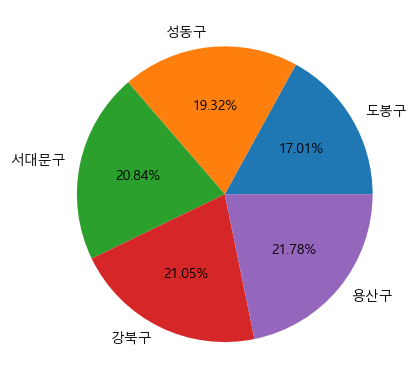

In [19]:
#파이 차트 생성하고 꾸미기

plt.pie(하위5개['범죄발생합계'], labels=하위5개['자치구별'], autopct="%.2f%%")
plt.show()
